# House Price Predictor

In this notebook I am trying to build a model that can predict a house sale price.

This is for a Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

The evaluation metric is RMSE (Root Mean Squared Error)

In [1]:
# Import tools
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Import data and doing EDA

In [2]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Checking the percentage of missing values
for feature in df.columns:
    if df[feature].isna().sum():
        print(feature, f"{df[feature].isna().sum()/len(df):.4f}%")

LotFrontage 0.1774%
Alley 0.9377%
MasVnrType 0.5973%
MasVnrArea 0.0055%
BsmtQual 0.0253%
BsmtCond 0.0253%
BsmtExposure 0.0260%
BsmtFinType1 0.0253%
BsmtFinType2 0.0260%
Electrical 0.0007%
FireplaceQu 0.4726%
GarageType 0.0555%
GarageYrBlt 0.0555%
GarageFinish 0.0555%
GarageQual 0.0555%
GarageCond 0.0555%
PoolQC 0.9952%
Fence 0.8075%
MiscFeature 0.9630%


In [6]:
df.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

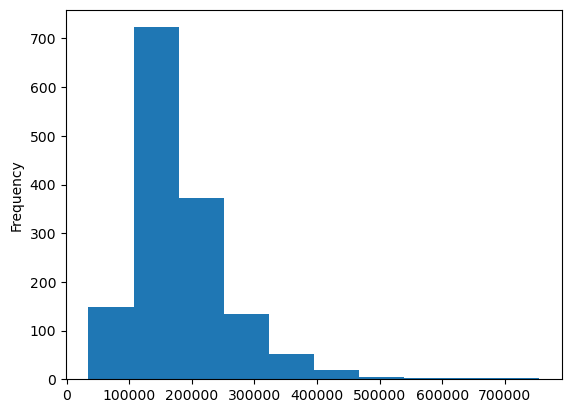

In [7]:
df["SalePrice"].plot.hist();

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


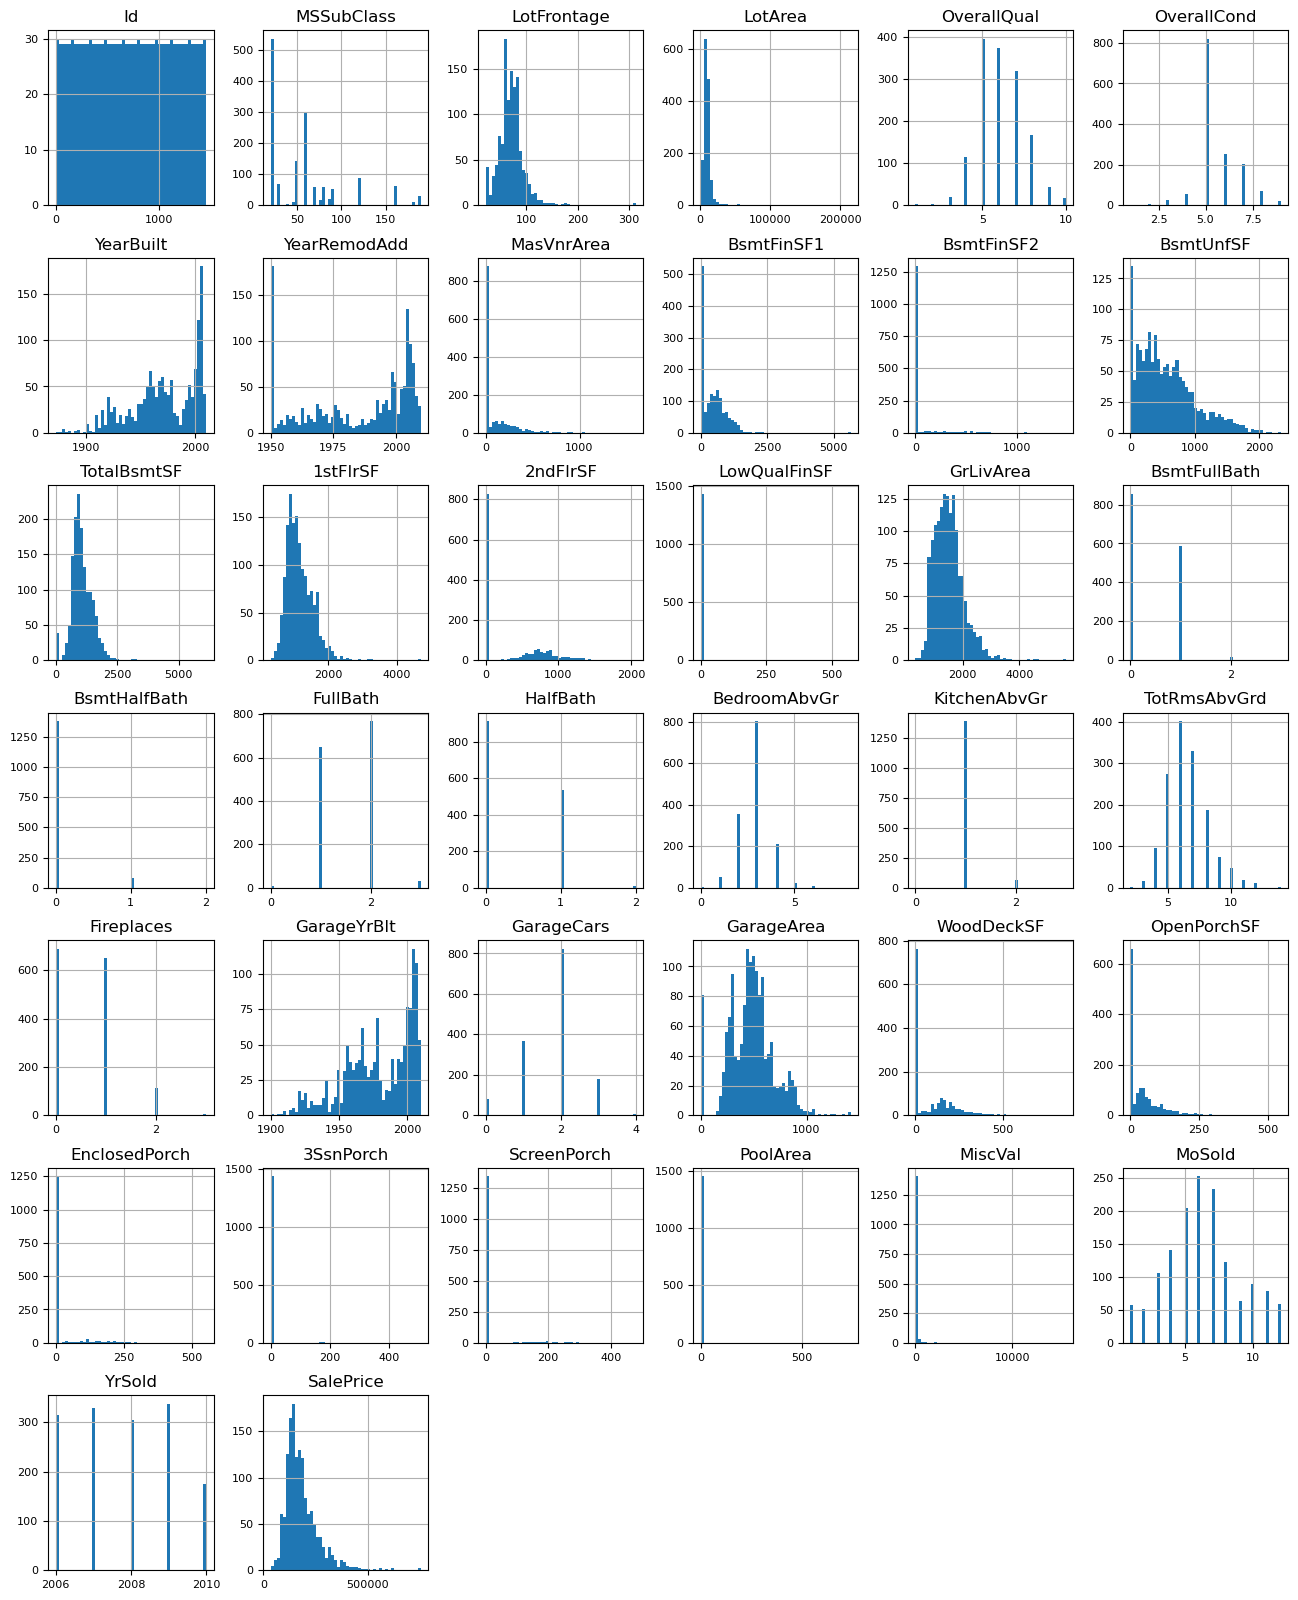

In [9]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
for i in df.columns:
    if pd.api.types.is_object_dtype(df[i]):
        df[i] = pd.Categorical(df[i])
        df[i] = df[i].cat.codes + 1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.head().T

,0,1,2,3,4
Id,1.0,2.0,3.0,4.0,5.0
MSSubClass,60.0,20.0,60.0,70.0,60.0
MSZoning,4.0,4.0,4.0,4.0,4.0
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
...,...,...,...,...,...
MoSold,2.0,5.0,9.0,2.0,12.0
YrSold,2008.0,2007.0,2008.0,2006.0,2008.0
SaleType,9.0,9.0,9.0,9.0,9.0
SaleCondition,5.0,5.0,5.0,1.0,5.0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import root_mean_squared_error

In [14]:
# We are going to split the data into test and validation sets
X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train.shape, X_val.shape

((1168, 80), (292, 80))

In [15]:
# Train our first model
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
model.score(X_val, y_val)

0.7849078522098863

In [17]:
y_pred = model.predict(X_val)

In [18]:
root_mean_squared_error(y_val, y_pred)

32372.22849179982

In [19]:
rs_grid = {"min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,10,2),
           "n_estimators": np.arange(10,110,10),
           "max_depth": [None, 3, 5, 10],
           "max_features": [0.5, 1, "sqrt"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(), rs_grid, n_iter=20, cv=5)
rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [20]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [21]:
bp_model = RandomForestRegressor(n_estimators=100, 
                                 min_samples_split=12,
                                 min_samples_leaf=5,
                                 max_features=0.5,
                                 max_depth=10)
bp_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=5,
                      min_samples_split=12)

In [22]:
y_pred = bp_model.predict(X_val)

In [23]:
root_mean_squared_error(y_val, y_pred)

31269.267017037208

In [24]:
bp_model.fit(X, y)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=5,
                      min_samples_split=12)

In [26]:
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [28]:
for i in test.columns:
    if pd.api.types.is_object_dtype(test[i]):
        test[i] = pd.Categorical(test[i])
        test[i] = test[i].cat.codes + 1

In [33]:
y_pred = bp_model.predict(test)
y_pred

array([125385.81059197, 153094.65042459, 180058.3158349 , ...,
       157643.59598525, 116868.93072633, 226128.31661125])

In [43]:
submission = pd.DataFrame()
submission["Id"] = test["Id"]
submission["SalePrice"] = y_pred
submission.set_index("Id")
submission

,Id,SalePrice
0,1461,125385.810592
1,1462,153094.650425
2,1463,180058.315835
3,1464,182271.201070
4,1465,199400.062293
...,...,...
1454,2915,88972.937284
1455,2916,89096.552219
1456,2917,157643.595985
1457,2918,116868.930726


In [44]:
submission.to_csv("house-prices-advanced-regression-techniques/first_submission.csv", index=False)

This submission scored `0.15024`